# Importing Required Libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
import re
# import os
# import requests
# import zipfile
import nltk
import pickle
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

warnings.filterwarnings("ignore")
np.random.seed(42)

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Import Sentiment140 Twitter dataset 

In [2]:
# Step 1: Download the dataset (if not already downloaded)
# url = "https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip"
# zip_path = r"C:\Users\lenovo\Downloads\trainingandtestdata.zip"

# if not os.path.exists(zip_path):
#     print("Downloading dataset...")
#     r = requests.get(url)
#     with open(zip_path, "wb") as f:
#         f.write(r.content)

# Step 2: Unzip the file
# with zipfile.ZipFile(zip_path, "r") as zip_ref:
#     zip_ref.extractall(".")

In [3]:
file_path = r"C:\Users\lenovo\Downloads\trainingandtestdata\training.1600000.processed.noemoticon.csv"

df = pd.read_csv(file_path, encoding="latin-1", header=None)
df.columns = ["target", "id", "date", "flag", "user", "text"]

df["target"] = df["target"].map({0: "negative", 4: "positive"})

df = df.sample(20000, random_state=42).reset_index(drop=True)

# Exploratory Data Analysis(EDA)

In [4]:
df.head(10)

,target,id,date,flag,user,text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem
5,negative,2052380495,Sat Jun 06 00:32:16 PDT 2009,NO_QUERY,Yengching,Going to miss Pastor's sermon on Faith...
6,positive,1983449090,Sun May 31 13:10:36 PDT 2009,NO_QUERY,jessig06,on lunch....dj should come eat with me
7,negative,2245479748,Fri Jun 19 16:11:29 PDT 2009,NO_QUERY,felicityfuller,@piginthepoke oh why are you feeling like that?
8,negative,1770705699,Mon May 11 22:01:32 PDT 2009,NO_QUERY,stephiiheyy,gahh noo!peyton needs to live!this is horrible
9,positive,1970386589,Sat May 30 03:39:34 PDT 2009,NO_QUERY,wyndwitch,@mrstessyman thank you glad you like it! There...


In [5]:
df.tail(10)

,target,id,date,flag,user,text
19990,positive,2059682753,Sat Jun 06 17:25:29 PDT 2009,NO_QUERY,partyprincess22,ahh! goin to kahala beach to soak up some much...
19991,negative,2222197065,Thu Jun 18 06:38:20 PDT 2009,NO_QUERY,The_Timekeeper,@tiptoetoo Our 9-y-o greyhound is allergic to ...
19992,positive,1978797556,Sun May 31 00:30:13 PDT 2009,NO_QUERY,Nololos,@al999 I just got this tweet from u. I'm watch...
19993,negative,2259552424,Sat Jun 20 17:46:24 PDT 2009,NO_QUERY,CrymsonTears,Hungry and missing my sister.
19994,positive,1677131871,Sat May 02 00:35:51 PDT 2009,NO_QUERY,RICHARDBARONE,Twitter me your tour thoughts... What cities? ...
19995,positive,1981517014,Sun May 31 09:19:12 PDT 2009,NO_QUERY,gemmaridlington,Loving the weather Although we're not having ...
19996,negative,2245469775,Fri Jun 19 16:10:38 PDT 2009,NO_QUERY,musicroxmysockz,Me and andrea r. last day of school..... http...
19997,positive,2063022808,Sun Jun 07 01:05:46 PDT 2009,NO_QUERY,ElaineToni,Just finished watching Your Song Presents: Boy...
19998,positive,1982082859,Sun May 31 10:29:36 PDT 2009,NO_QUERY,lindseyrd20,@janfran813 awww i can't wait to get one
19999,negative,2191411608,Tue Jun 16 05:13:11 PDT 2009,NO_QUERY,spiritkl,"is indeed, a rather large hoarder of paper. &a..."


In [6]:
df.shape

(20000, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  20000 non-null  object
 1   id      20000 non-null  int64 
 2   date    20000 non-null  object
 3   flag    20000 non-null  object
 4   user    20000 non-null  object
 5   text    20000 non-null  object
dtypes: int64(1), object(5)
memory usage: 937.6+ KB


In [8]:
df["flag"].value_counts(normalize= True)

flag
NO_QUERY    1.0
Name: proportion, dtype: float64

In [9]:
df["target"].value_counts(normalize= True)

target
positive    0.5029
negative    0.4971
Name: proportion, dtype: float64

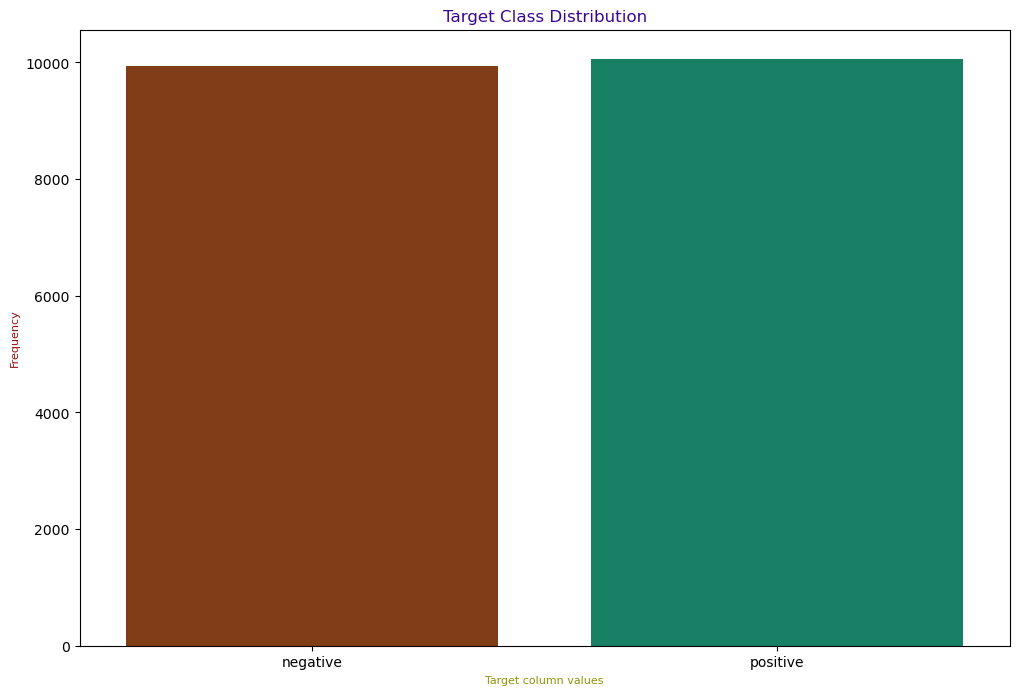

In [10]:
fig = plt.figure(figsize= (12, 8))
cols = ['#923807', '#07926d']
fig = sns.countplot(x= df["target"], palette= cols)
fig.set_title("Target Class Distribution", fontsize= 12, color= '#3b0792')
fig.set_xlabel("Target column values", fontsize= 8, color= "#909207")
fig.set_ylabel("Frequency", fontsize= 8, color= "#920c07")
plt.show();

In [11]:
df["tweets_length"] = df["text"].apply(len)
df.head()

,target,id,date,flag,user,text,tweets_length
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,38
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",57
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,137
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,91
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,22


In [12]:
df['tweets_words_length'] = df.apply(lambda row: word_tokenize(row["text"]), axis= 1).apply(len)
df['tweets_sentences_length'] = df.apply(lambda row: sent_tokenize(row["text"]), axis= 1).apply(len)
df.head()

,target,id,date,flag,user,text,tweets_length,tweets_words_length,tweets_sentences_length
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,10,2
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",57,13,1
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,137,30,2
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,91,22,2
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,22,3,1


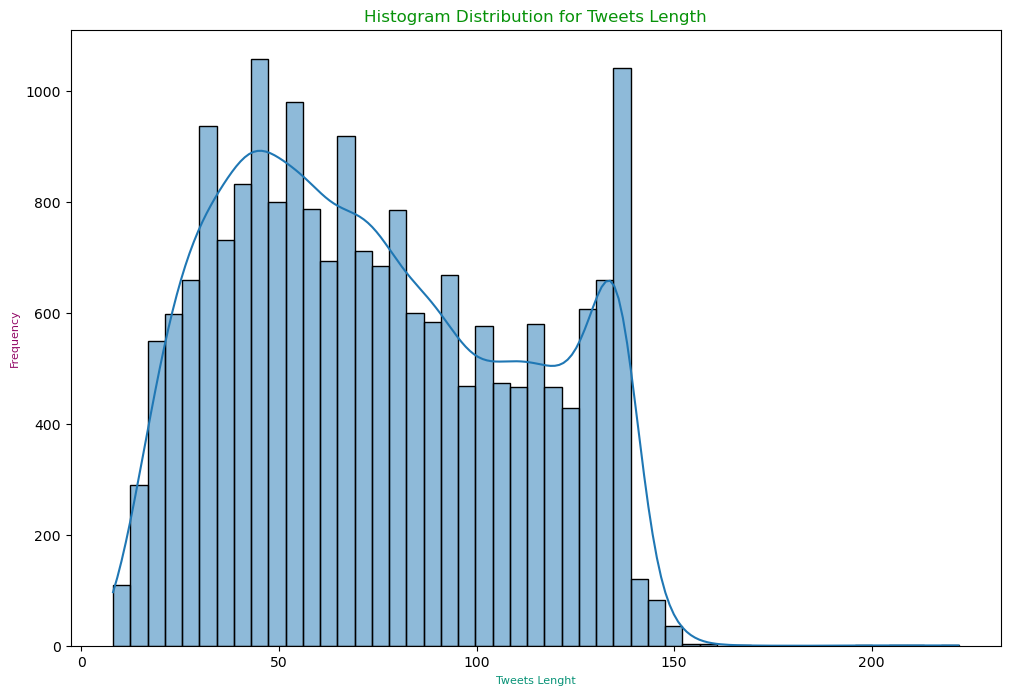

In [13]:
fig = plt.figure(figsize= (12, 8))
fig = sns.histplot(x= df["tweets_length"], kde= True)
fig.set_title("Histogram Distribution for Tweets Length", fontsize= 12, color= "#079209")
fig.set_xlabel("Tweets Lenght", fontsize= 8, color= "#079276")
fig.set_ylabel("Frequency", fontsize= 8, color= "#920766")
plt.show();

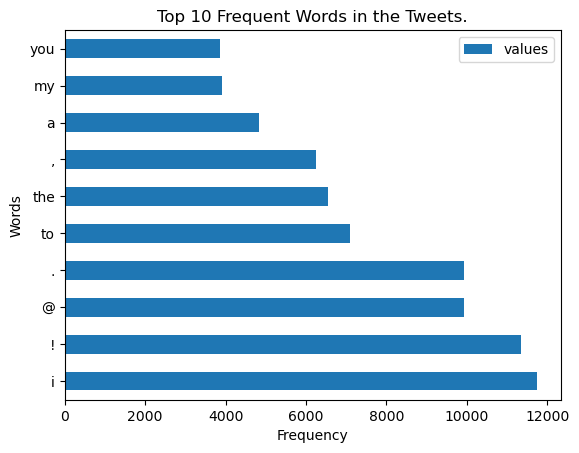

In [14]:
top_frequent_tokens = {}

for tweet in df["text"].str.lower():
    tokenized_tweets = word_tokenize(tweet)
    for token in tokenized_tweets:
        if token not in top_frequent_tokens.keys():
            top_frequent_tokens[token] = 1
        else:
            top_frequent_tokens[token] += 1

top_frequent_tokens_df = pd.DataFrame(top_frequent_tokens.values(), index= top_frequent_tokens.keys(), columns = ["values"])

top_frequent_tokens_df.sort_values("values", ascending= False).head(10).plot(kind= "barh", title= "Top 10 Frequent Words in the Tweets.")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show();

In [15]:
five_sample_tweets = df.sample(5, random_state= 42).reset_index(drop= True)
five_sample_tweets

,target,id,date,flag,user,text,tweets_length,tweets_words_length,tweets_sentences_length
0,negative,2218868086,Wed Jun 17 23:18:30 PDT 2009,NO_QUERY,lifeofkirby,"cpr fail day, i turned it off instead of shock...",62,13,1
1,negative,1999759768,Mon Jun 01 20:46:21 PDT 2009,NO_QUERY,asbuchanan,Laying in the bed because I just found out I'v...,116,30,2
2,negative,2324955566,Thu Jun 25 04:26:29 PDT 2009,NO_QUERY,No_Sssophie,GRUMPY FUCK. i hate when people take there wee...,102,23,3
3,negative,1771075817,Mon May 11 23:07:08 PDT 2009,NO_QUERY,sparkadiah,@lolstephy pls just shutup about splendour n d...,82,16,1
4,negative,2254012428,Sat Jun 20 09:05:34 PDT 2009,NO_QUERY,dieselboy28,@chrisoldroyd Only UK? What about N. America ...,70,13,2


In [16]:
def clean(text):
    # remove urls
    text = re.sub(r"http://\w*\.\w*/?\w?/?\w*|http://\w*-\w*.\w*.\w*|http:/\W*", "", text)
    # remove mentions
    text = re.sub(r"@\w*", "", text)
    # remove hashtags
    text = re.sub(r"#\w*", "", text)
    # remove emojies
    text = re.sub(r'[^\x00-\x7F]+', "", text)
    # remove double spaces
    text = text.split()
    text = " ".join(text)
    return text if text else None

df["cleaned_text"] = df["text"].apply(clean)
df.head()

,target,id,date,flag,user,text,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,10,2,AHHH I HOPE YOUR OK!!!
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",57,13,1,"cool , i have no tweet apps for my razr 2"
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,137,30,2,i know just family drama. its lame.hey next ti...
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,91,22,2,School email won't open and I have geography s...
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,22,3,1,upper airways problem


In [17]:
three_sample = df[df["text"].str.contains("#")][["text", "cleaned_text"]].head(3)
three_sample

,text,cleaned_text
57,@melbgirl It means the same to us! #GoCats,It means the same to us!
128,#iranelection The &quot;yellow Press&quot; is ...,The &quot;yellow Press&quot; is alive and well...
149,Enjoying the morning just hanging out with Jul...,Enjoying the morning just hanging out with Jul...


In [18]:
three_sample = df[df["text"].str.contains("@")][["text", "cleaned_text"]].head(3)
three_sample

,text,cleaned_text
0,@chrishasboobs AHHH I HOPE YOUR OK!!!,AHHH I HOPE YOUR OK!!!
1,"@misstoriblack cool , i have no tweet apps fo...","cool , i have no tweet apps for my razr 2"
2,@TiannaChaos i know just family drama. its la...,i know just family drama. its lame.hey next ti...


In [19]:
three_sample = df[df["text"].str.contains("http")][["text", "cleaned_text"]].head(3)
three_sample

,text,cleaned_text
37,How to Get Your Ex Back (worked for me http:/...,How to Get Your Ex Back (worked for me
140,If you can take criticism and blame without re...,If you can take criticism and blame without re...
273,Changed the background on here. About to go wa...,Changed the background on here. About to go wa...


In [20]:
nlp = spacy.load("en_core_web_sm")

def case_folding_and_tokenize(text):
    if text is not None:
        text = text.lower()
        doc = nlp(text)
        tokenized_text = [token.text for token in doc]
        return tokenized_text if tokenized_text else None

df["cleaned_text"] = df["cleaned_text"].apply(case_folding_and_tokenize)
df.head()

,target,id,date,flag,user,text,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,10,2,"[ahhh, i, hope, your, ok, !, !, !]"
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",57,13,1,"[cool, ,, i, have, no, tweet, apps, for, my, r..."
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,137,30,2,"[i, know, just, family, drama, ., its, lame.he..."
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,91,22,2,"[school, email, wo, n't, open, and, i, have, g..."
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,22,3,1,"[upper, airways, problem]"


In [21]:
tokenized_unique_words = set()

for token_list in df["cleaned_text"]:
    if token_list is not None:
        for word in token_list:
            tokenized_unique_words.add(word)
            
print(f"Vocabulary size before cleaning = {len(top_frequent_tokens.keys())}")
print(f"Vocabulary size after cleaning = {len(tokenized_unique_words)}")

Vocabulary size before cleaning = 32105
Vocabulary size after cleaning = 22178


In [22]:
stopwords = set(stopwords.words("english"))

def remove_stopwords(text):
    if text is not None:
        text = [word for word in text if word not in stopwords]
        return text if text else None

df["cleaned_text"] = df["cleaned_text"].apply(remove_stopwords)
df.head()

,target,id,date,flag,user,text,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,10,2,"[ahhh, hope, ok, !, !, !]"
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",57,13,1,"[cool, ,, tweet, apps, razr, 2]"
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,137,30,2,"[know, family, drama, ., lame.hey, next, time,..."
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,91,22,2,"[school, email, wo, n't, open, geography, stuf..."
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,22,3,1,"[upper, airways, problem]"


In [23]:
nlp = spacy.load("en_core_web_sm")

def remove_punctuation(text):
    if text is not None:
        text = " ".join(text)
        doc = nlp(text)
        filtered_token = [token.text for token in doc if token.pos_ != "PUNCT"]
        return filtered_token if filtered_token else None

df["cleaned_text"] = df["cleaned_text"].apply(remove_punctuation)
df.head()

,target,id,date,flag,user,text,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,10,2,"[ahhh, hope, ok]"
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",57,13,1,"[cool, tweet, apps, razr, 2]"
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,137,30,2,"[know, family, drama, lame.hey, next, time, u,..."
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,91,22,2,"[school, email, wo, n't, open, geography, stuf..."
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,22,3,1,"[upper, airways, problem]"


In [24]:
nlp = spacy.load("en_core_web_sm")

def replace_numbers(text):
    if text is not None:
        text = " ".join(text)
        doc = nlp(text)
        text = ["<NUM>" if token.pos_ == "NUM" else token.text for token in doc]
        return text if text else None

df["cleaned_text"] = df["cleaned_text"].apply(replace_numbers)
df.head()

,target,id,date,flag,user,text,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,10,2,"[ahhh, hope, ok]"
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",57,13,1,"[cool, tweet, apps, razr, <NUM>]"
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,137,30,2,"[know, family, drama, lame.hey, next, time, u,..."
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,91,22,2,"[school, email, wo, n't, open, geography, stuf..."
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,22,3,1,"[upper, airways, problem]"


## I have preferred to remove punctuations because it doesn't have any useful meaning, while changing numbers to <NUM> tokens. As the number would have some useful meaning like ratings, quantities, and more useful information.

In [25]:
df_porter = df.copy()
porter = PorterStemmer()

def stemming(text):
    if text is not None:
        text = [porter.stem(word) for word in text]
        return text if text else None
    
df_porter["cleaned_text"] = df_porter["cleaned_text"].apply(stemming)
df_porter.head()

,target,id,date,flag,user,text,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,10,2,"[ahhh, hope, ok]"
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",57,13,1,"[cool, tweet, app, razr, <num>]"
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,137,30,2,"[know, famili, drama, lame.hey, next, time, u,..."
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,91,22,2,"[school, email, wo, n't, open, geographi, stuf..."
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,22,3,1,"[upper, airway, problem]"


In [26]:
df_lemmatizer = df.copy()

nlp = spacy.load("en_core_web_sm")

def lemmitization(text):
    if text is not None:
        text = " ".join(text)
        doc = nlp(text)
        text = [token.lemma_ for token in doc]
        return text if text else None

df_lemmatizer["cleaned_text"] = df_lemmatizer["cleaned_text"].apply(lemmitization)
df_lemmatizer.head()

,target,id,date,flag,user,text,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,10,2,"[ahhh, hope, ok]"
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",57,13,1,"[cool, tweet, app, razr, <, NUM, >]"
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,137,30,2,"[know, family, drama, lame.hey, next, time, u,..."
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,91,22,2,"[school, email, will, not, open, geography, st..."
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,22,3,1,"[upper, airway, problem]"


In [27]:
df_stem_lemma = df.copy()

def stemming(text):
    if text is not None:
        text = [porter.stem(word) for word in text]
        return text if text else None

def lemmitization(text):
    if text is not None:
        text = " ".join(text)
        doc = nlp(text)
        text = [token.lemma_ for token in doc]
        return text if text else None

df_stem_lemma["cleaned_text_stem"] = df_stem_lemma["cleaned_text"].apply(stemming)
df_stem_lemma["cleaned_text_lemma"] = df_stem_lemma["cleaned_text"].apply(lemmitization)

twenty_random_samples = df_stem_lemma.sample(20, random_state= 42).reset_index(drop= True)[["text", "cleaned_text", "cleaned_text_stem", "cleaned_text_lemma"]]
twenty_random_samples

,text,cleaned_text,cleaned_text_stem,cleaned_text_lemma
0,"cpr fail day, i turned it off instead of shock...","[cpr, fail, day, turned, instead, shocking, pa...","[cpr, fail, day, turn, instead, shock, patient]","[cpr, fail, day, turn, instead, shocking, pati..."
1,Laying in the bed because I just found out I'v...,"[laying, bed, found, ', ve, got, <NUM>, yuck, ...","[lay, bed, found, ', ve, got, <num>, yuck, ca,...","[lay, bed, find, ', ve, get, <, NUM, >, yuck, ..."
2,GRUMPY FUCK. i hate when people take there wee...,"[grumpy, fuck, hate, people, take, wee, moods,...","[grumpi, fuck, hate, peopl, take, wee, mood, c...","[grumpy, fuck, hate, people, take, wee, mood, ..."
3,@lolstephy pls just shutup about splendour n d...,"[pls, shutup, splendour, n, nt, talk, till, ne...","[pl, shutup, splendour, n, nt, talk, till, nex...","[pls, shutup, splendour, n, not, talk, till, n..."
4,@chrisoldroyd Only UK? What about N. America ...,"[uk, n., america, still, waiting, tomtom]","[uk, n., america, still, wait, tomtom]","[uk, n., america, still, wait, tomtom]"
5,they added a new zodiac sign. i wanna be a sco...,"[added, new, zodiac, sign, wanna, scorpio, for...","[ad, new, zodiac, sign, wanna, scorpio, forev]","[add, new, zodiac, sign, wanna, scorpio, forever]"
6,"Ooh... IE8 looks kinda flasher than 7, and it ...","[ooh, ie8, looks, kinda, flasher, <NUM>, seem,...","[ooh, ie8, look, kinda, flasher, <num>, seem, ...","[ooh, ie8, look, kinda, flasher, <, NUM, >, se..."
7,snow snow snow snow snow snow snow snow snow y...,"[snow, snow, snow, snow, snow, snow, snow, sno...","[snow, snow, snow, snow, snow, snow, snow, sno...","[snow, snow, snow, snow, snow, snow, snow, sno..."
8,"right, been up half an hour, hang over is not ...","[right, half, hour, hang, bad, start, mammoth,...","[right, half, hour, hang, bad, start, mammoth,...","[right, half, hour, hang, bad, start, mammoth,..."
9,"@da_evil ok,u work im gonna check vampire's news","[ok, u, work, gon, na, check, vampire, 's, news]","[ok, u, work, gon, na, check, vampir, 's, news]","[ok, u, work, go, to, check, vampire, 's, news]"


In [28]:
df_porter.isnull().sum()

target                       0
id                           0
date                         0
flag                         0
user                         0
text                         0
tweets_length                0
tweets_words_length          0
tweets_sentences_length      0
cleaned_text               107
dtype: int64

In [29]:
df_lemmatizer.isnull().sum()

target                       0
id                           0
date                         0
flag                         0
user                         0
text                         0
tweets_length                0
tweets_words_length          0
tweets_sentences_length      0
cleaned_text               107
dtype: int64

In [30]:
df_porter = df_porter.dropna()
df_lemmatizer = df_lemmatizer.dropna() 

In [31]:
df_porter.isnull().sum()

target                     0
id                         0
date                       0
flag                       0
user                       0
text                       0
tweets_length              0
tweets_words_length        0
tweets_sentences_length    0
cleaned_text               0
dtype: int64

In [32]:
df_lemmatizer.isnull().sum()

target                     0
id                         0
date                       0
flag                       0
user                       0
text                       0
tweets_length              0
tweets_words_length        0
tweets_sentences_length    0
cleaned_text               0
dtype: int64

In [33]:
cols_to_drop = ["id", "date", "flag", "user", "text"]
df_porter = df_porter.drop(columns= cols_to_drop, axis= 1)
df_lemmatizer = df_lemmatizer.drop(columns= cols_to_drop, axis= 1)

In [34]:
df_porter.head()

,target,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,negative,38,10,2,"[ahhh, hope, ok]"
1,negative,57,13,1,"[cool, tweet, app, razr, <num>]"
2,negative,137,30,2,"[know, famili, drama, lame.hey, next, time, u,..."
3,negative,91,22,2,"[school, email, wo, n't, open, geographi, stuf..."
4,negative,22,3,1,"[upper, airway, problem]"


In [35]:
df_lemmatizer.head()

,target,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,negative,38,10,2,"[ahhh, hope, ok]"
1,negative,57,13,1,"[cool, tweet, app, razr, <, NUM, >]"
2,negative,137,30,2,"[know, family, drama, lame.hey, next, time, u,..."
3,negative,91,22,2,"[school, email, will, not, open, geography, st..."
4,negative,22,3,1,"[upper, airway, problem]"


In [36]:
nlp = spacy.load("en_core_web_sm")

def clean(text):
    if text is not None:
        text = " ".join(text)
        text = re.sub(r"<|>", "", text)
        text = text.split()
        text = " ".join(text)
        doc = nlp(text)
        text = [token.text for token in doc]
        return text if text else None

df_lemmatizer["cleaned_text"] = df_lemmatizer["cleaned_text"].apply(clean)
df_lemmatizer.head()

,target,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,negative,38,10,2,"[ahhh, hope, ok]"
1,negative,57,13,1,"[cool, tweet, app, razr, NUM]"
2,negative,137,30,2,"[know, family, drama, lame.hey, next, time, u,..."
3,negative,91,22,2,"[school, email, will, not, open, geography, st..."
4,negative,22,3,1,"[upper, airway, problem]"


In [37]:
corpus = []

for i in df_lemmatizer["cleaned_text"]:
    msg = " ".join([word for word in i])
    corpus.append(msg)

In [38]:
tf_idf = TfidfVectorizer(max_features= 5000)
X = tf_idf.fit_transform(corpus).toarray()

In [39]:
le = LabelEncoder()
df_lemmatizer["target"] = le.fit_transform(df_lemmatizer["target"])

In [40]:
vocab = tf_idf.get_feature_names_out()
print(f"Length of vocab = {len(vocab)}")

Length of vocab = 5000


In [41]:
y = df_lemmatizer["target"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [43]:
lg = LogisticRegression(random_state= 42)
lg.fit(X_train, y_train)
y_pred_train = lg.predict(X_train)
y_pred = lg.predict(X_test)
print(f"Training Lemmitizer Method Accuracy = {accuracy_score(y_train, y_pred_train)}")
print(f"Testing Lemmitizer Method Accuracy = {accuracy_score(y_test, y_pred)}")
print(f"Lemmitizer Method F1-Score = {f1_score(y_test, y_pred)}")

Training Lemmitizer Method Accuracy = 0.8170164634912656
Testing Lemmitizer Method Accuracy = 0.7341040462427746
Lemmitizer Method F1-Score = 0.7434529582929195


In [44]:
corpus = []

for i in df_porter["cleaned_text"]:
    msg = " ".join([word for word in i])
    corpus.append(msg)

In [45]:
X = tf_idf.fit_transform(corpus).toarray()

In [46]:
df_porter["target"] = le.fit_transform(df_porter["target"])

In [47]:
vocab = tf_idf.get_feature_names_out()
print(f"Length of vocab = {len(vocab)}")

Length of vocab = 5000


In [48]:
y = df_porter["target"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [50]:
lg = LogisticRegression(random_state= 42)
lg.fit(X_train, y_train)
y_pred_train = lg.predict(X_train)
y_pred = lg.predict(X_test)
print(f"Training Lemmitizer Method Accuracy = {accuracy_score(y_train, y_pred_train)}")
print(f"Testing Lemmitizer Method Accuracy = {accuracy_score(y_test, y_pred)}")
print(f"Lemmitizer Method F1-Score = {f1_score(y_test, y_pred)}")

Training Lemmitizer Method Accuracy = 0.8140630891039337
Testing Lemmitizer Method Accuracy = 0.7338527268157828
Lemmitizer Method F1-Score = 0.7430235379762193


## Porter Stemmer and lemmitizer achieves the same train, test, and F1-score scores, so we will use Lemmiziter method

In [51]:
def lemmitization(text):
    if text is not None:
        text = " ".join(text)
        doc = nlp(text)
        text = [token.lemma_ for token in doc]
        return text if text else None

def clean(text):
    if text is not None:
        text = " ".join(text)
        text = re.sub(r"<|>", "", text)
        text = text.split()
        text = " ".join(text)
        doc = nlp(text)
        text = [token.text for token in doc]
        return text if text else None

df["cleaned_text"] = df["cleaned_text"].apply(lemmitization)
df["cleaned_text"] = df["cleaned_text"].apply(clean)
df.head()

,target,id,date,flag,user,text,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,10,2,"[ahhh, hope, ok]"
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",57,13,1,"[cool, tweet, app, razr, NUM]"
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,137,30,2,"[know, family, drama, lame.hey, next, time, u,..."
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,91,22,2,"[school, email, will, not, open, geography, st..."
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,22,3,1,"[upper, airway, problem]"


In [52]:
df_with_pos_features = df.copy()

nlp = spacy.load("en_core_web_sm")

pos_tags = [
    "NOUN", "VERB", "ADJ", "ADV", "PRON", "DET", "ADP", "NUM", "CONJ", "PART",
    "INTJ", "PROPN", "X", "AUX", "CCONJ", "SCONJ", "SYM"
]

for pos in pos_tags:
    df_with_pos_features[pos] = 0

def extract_pos_counts(text):
    
    if text is None:
        return {pos: 0 for pos in pos_tags}
        
    text = " ".join(text)
    doc = nlp(text)
    counts = doc.count_by(spacy.attrs.POS)
    pos_counts = {pos: 0 for pos in pos_tags}
    for pos_id, count_values in counts.items():
        pos_name = doc.vocab[pos_id].text
        if pos_name in pos_tags:
            pos_counts[pos_name] = count_values
            
    return pos_counts

for idx, text in df_with_pos_features["cleaned_text"].items():
    pos_counts = extract_pos_counts(text)
    for pos, count in pos_counts.items():
        df_with_pos_features.at[idx, pos] = count

df_with_pos_features.head()

,target,id,date,flag,user,text,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text,...,NUM,CONJ,PART,INTJ,PROPN,X,AUX,CCONJ,SCONJ,SYM
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,10,2,"[ahhh, hope, ok]",...,0,0,0,1,1,0,0,0,0,0
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",57,13,1,"[cool, tweet, app, razr, NUM]",...,0,0,0,0,3,0,0,0,0,0
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,137,30,2,"[know, family, drama, lame.hey, next, time, u,...",...,0,0,0,1,3,0,0,0,0,0
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,91,22,2,"[school, email, will, not, open, geography, st...",...,0,0,1,0,0,0,1,0,0,0
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,22,3,1,"[upper, airway, problem]",...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_without_pos_features = df.copy()
df_without_pos_features.head()

,target,id,date,flag,user,text,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,10,2,"[ahhh, hope, ok]"
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",57,13,1,"[cool, tweet, app, razr, NUM]"
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,137,30,2,"[know, family, drama, lame.hey, next, time, u,..."
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,91,22,2,"[school, email, will, not, open, geography, st..."
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,22,3,1,"[upper, airway, problem]"


In [54]:
df_without_pos_features = df_without_pos_features.drop(columns= cols_to_drop, axis= 1)
df_with_pos_features = df_with_pos_features.drop(columns= cols_to_drop, axis= 1)

In [55]:
df_without_pos_features.head()

,target,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,negative,38,10,2,"[ahhh, hope, ok]"
1,negative,57,13,1,"[cool, tweet, app, razr, NUM]"
2,negative,137,30,2,"[know, family, drama, lame.hey, next, time, u,..."
3,negative,91,22,2,"[school, email, will, not, open, geography, st..."
4,negative,22,3,1,"[upper, airway, problem]"


In [56]:
df_with_pos_features.head()

,target,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text,NOUN,VERB,ADJ,ADV,PRON,...,NUM,CONJ,PART,INTJ,PROPN,X,AUX,CCONJ,SCONJ,SYM
0,negative,38,10,2,"[ahhh, hope, ok]",1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,negative,57,13,1,"[cool, tweet, app, razr, NUM]",0,1,1,0,0,...,0,0,0,0,3,0,0,0,0,0
2,negative,137,30,2,"[know, family, drama, lame.hey, next, time, u,...",7,2,2,0,2,...,0,0,0,1,3,0,0,0,0,0
3,negative,91,22,2,"[school, email, will, not, open, geography, st...",5,2,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,negative,22,3,1,"[upper, airway, problem]",2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df_without_pos_features["target"] = le.fit_transform(df_without_pos_features["target"])
df_with_pos_features["target"] = le.fit_transform(df_with_pos_features["target"])

In [58]:
df_without_pos_features.isnull().sum()

target                       0
tweets_length                0
tweets_words_length          0
tweets_sentences_length      0
cleaned_text               107
dtype: int64

In [59]:
df_without_pos_features = df_without_pos_features.dropna()

In [60]:
df_without_pos_features.isnull().sum()

target                     0
tweets_length              0
tweets_words_length        0
tweets_sentences_length    0
cleaned_text               0
dtype: int64

In [61]:
corpus = []
for i in df_without_pos_features["cleaned_text"]:
    msg = " ".join([word for word in i])
    corpus.append(msg)

In [62]:
X = df_without_pos_features.drop(columns= "target")
y = df_without_pos_features["target"]

In [63]:
X_tfidf = tf_idf.fit_transform(corpus).toarray()

features = tf_idf.get_feature_names_out()

X_tfidf_df = pd.DataFrame(
    X_tfidf,
    columns= features,
    index= df_without_pos_features.index
)

In [64]:
X = pd.concat([X, X_tfidf_df], axis= 1)
X = X.drop(columns= "cleaned_text")
X.head()

,tweets_length,tweets_words_length,tweets_sentences_length,10,100,100th,10k,10th,11,12,...,yy,zac,zach,zack,zap,zealand,zee,zombie,zone,zoo
0,38,10,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,57,13,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,137,30,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,91,22,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [66]:
lg = LogisticRegression(random_state= 42)
lg.fit(X_train, y_train)
y_pred_train = lg.predict(X_train)
y_pred = lg.predict(X_test)
print(f"Without POS Tagging Count Method Training Accuracy = {accuracy_score(y_train, y_pred_train)}")
print(f"Without POS Tagging Count Method Testing Accuracy = {accuracy_score(y_test, y_pred)}")
print(f"Without POS Tagging Count Method F1-Score = {f1_score(y_test, y_pred)}")

Without POS Tagging Count Method Training Accuracy = 0.7904989317582003
Without POS Tagging Count Method Testing Accuracy = 0.7308368936918824
Without POS Tagging Count Method F1-Score = 0.7406151610559457


In [67]:
df_with_pos_features.isnull().sum()

target                       0
tweets_length                0
tweets_words_length          0
tweets_sentences_length      0
cleaned_text               107
NOUN                         0
VERB                         0
ADJ                          0
ADV                          0
PRON                         0
DET                          0
ADP                          0
NUM                          0
CONJ                         0
PART                         0
INTJ                         0
PROPN                        0
X                            0
AUX                          0
CCONJ                        0
SCONJ                        0
SYM                          0
dtype: int64

In [68]:
df_with_pos_features = df_with_pos_features.dropna()

In [69]:
df_with_pos_features.isnull().sum()

target                     0
tweets_length              0
tweets_words_length        0
tweets_sentences_length    0
cleaned_text               0
NOUN                       0
VERB                       0
ADJ                        0
ADV                        0
PRON                       0
DET                        0
ADP                        0
NUM                        0
CONJ                       0
PART                       0
INTJ                       0
PROPN                      0
X                          0
AUX                        0
CCONJ                      0
SCONJ                      0
SYM                        0
dtype: int64

In [70]:
corpus = []
for i in df_with_pos_features["cleaned_text"]:
    msg = " ".join([word for word in i])
    corpus.append(msg)

In [71]:
X = df_with_pos_features.drop(columns= "target")
y = df_with_pos_features["target"]

In [72]:
X_tfidf = tf_idf.fit_transform(corpus).toarray()

features = tf_idf.get_feature_names_out()

X_tfidf_df = pd.DataFrame(
    X_tfidf,
    columns= features,
    index= df_with_pos_features.index
) 

In [73]:
X = pd.concat([X, X_tfidf_df], axis= 1)
X = X.drop(columns= "cleaned_text", axis= 1)
X.head()

,tweets_length,tweets_words_length,tweets_sentences_length,NOUN,VERB,ADJ,ADV,PRON,DET,ADP,...,yy,zac,zach,zack,zap,zealand,zee,zombie,zone,zoo
0,38,10,2,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,57,13,1,0,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,137,30,2,7,2,2,0,2,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,91,22,2,5,2,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22,3,1,2,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [75]:
lg = LogisticRegression(random_state= 42)
lg.fit(X_train, y_train)
y_pred_train = lg.predict(X_train)
y_pred = lg.predict(X_test)
print(f"With POS Tagging Count Method Training Accuracy = {accuracy_score(y_train, y_pred_train)}")
print(f"With POS Tagging Count Method Testing Accuracy = {accuracy_score(y_test, y_pred)}")
print(f"With POS Tagging Count Method F1-Score = {f1_score(y_test, y_pred)}")

With POS Tagging Count Method Training Accuracy = 0.7701394998114868
With POS Tagging Count Method Testing Accuracy = 0.7330987685348077
With POS Tagging Count Method F1-Score = 0.7418570734078755


## Model Without Using POS Tagging Count Technique Achives Better Than the Model That Uses POS Tagging Count Technique, so We Will Not Use POS Tagging Count Technique   

In [76]:
df.head(10)

,target,id,date,flag,user,text,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,10,2,"[ahhh, hope, ok]"
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",57,13,1,"[cool, tweet, app, razr, NUM]"
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,137,30,2,"[know, family, drama, lame.hey, next, time, u,..."
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,91,22,2,"[school, email, will, not, open, geography, st..."
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,22,3,1,"[upper, airway, problem]"
5,negative,2052380495,Sat Jun 06 00:32:16 PDT 2009,NO_QUERY,Yengching,Going to miss Pastor's sermon on Faith...,42,9,1,"[go, miss, pastor, 's, sermon, faith]"
6,positive,1983449090,Sun May 31 13:10:36 PDT 2009,NO_QUERY,jessig06,on lunch....dj should come eat with me,39,9,1,"[lunch, dj, come, eat]"
7,negative,2245479748,Fri Jun 19 16:11:29 PDT 2009,NO_QUERY,felicityfuller,@piginthepoke oh why are you feeling like that?,48,10,1,"[oh, feel, like]"
8,negative,1770705699,Mon May 11 22:01:32 PDT 2009,NO_QUERY,stephiiheyy,gahh noo!peyton needs to live!this is horrible,47,11,1,"[gahh, noo!peyton, need, live!this, horrible]"
9,positive,1970386589,Sat May 30 03:39:34 PDT 2009,NO_QUERY,wyndwitch,@mrstessyman thank you glad you like it! There...,102,22,2,"[thank, glad, like, product, review, bit, site..."


In [77]:
df.isnull().sum()

target                       0
id                           0
date                         0
flag                         0
user                         0
text                         0
tweets_length                0
tweets_words_length          0
tweets_sentences_length      0
cleaned_text               107
dtype: int64

In [78]:
df = df.dropna()

In [79]:
#Bag of words
BOG = CountVectorizer(max_features= 5000)

corpus = []
for i in df["cleaned_text"]:
    msg = " ".join([word for word in i])
    corpus.append(msg)

X_bow = BOG.fit_transform(corpus).toarray()
print(f"Representation Dimension: {X_bow.shape}")
features = BOG.get_feature_names_out()
print(f"Vocabulary Size: {len(features)}")
bog_df = pd.DataFrame(X_bow, columns= features, index= df.index)
bog_df

Representation Dimension: (19893, 5000)
Vocabulary Size: 5000


,10,100,100th,10k,10th,11,12,12th,14th,15th,...,yy,zac,zach,zack,zap,zealand,zee,zombie,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
#Tfidf Vectorizer
tf_idf = TfidfVectorizer(max_features= 5000)

corpus = []
for i in df["cleaned_text"]:
    msg = " ".join([word for word in i])
    corpus.append(msg)

X_tfidf = tf_idf.fit_transform(corpus).toarray()
print(f"Representation Dimension: {X_tfidf.shape}")
features = tf_idf.get_feature_names_out()
print(f"Vocabulary Size: {len(features)}")
tfidf_df = pd.DataFrame(X_tfidf, columns= features, index= df.index)
tfidf_df

Representation Dimension: (19893, 5000)
Vocabulary Size: 5000


,10,100,100th,10k,10th,11,12,12th,14th,15th,...,yy,zac,zach,zack,zap,zealand,zee,zombie,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
df.head()

,target,id,date,flag,user,text,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,10,2,"[ahhh, hope, ok]"
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",57,13,1,"[cool, tweet, app, razr, NUM]"
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,137,30,2,"[know, family, drama, lame.hey, next, time, u,..."
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,91,22,2,"[school, email, will, not, open, geography, st..."
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,22,3,1,"[upper, airway, problem]"


In [82]:
df["date"] = pd.to_datetime(df["date"])
df.head()

,target,id,date,flag,user,text,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,negative,2200003196,2009-06-16 18:18:12,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,10,2,"[ahhh, hope, ok]"
1,negative,1467998485,2009-04-06 23:11:14,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",57,13,1,"[cool, tweet, app, razr, NUM]"
2,negative,2300048954,2009-06-23 13:40:11,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,137,30,2,"[know, family, drama, lame.hey, next, time, u,..."
3,negative,1993474027,2009-06-01 10:26:07,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,91,22,2,"[school, email, will, not, open, geography, st..."
4,negative,2256550904,2009-06-20 12:56:51,NO_QUERY,yogicerdito,upper airways problem,22,3,1,"[upper, airway, problem]"


In [83]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df.head()

,target,id,date,flag,user,text,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text,year,month,day
0,negative,2200003196,2009-06-16 18:18:12,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,10,2,"[ahhh, hope, ok]",2009,6,16
1,negative,1467998485,2009-04-06 23:11:14,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",57,13,1,"[cool, tweet, app, razr, NUM]",2009,4,6
2,negative,2300048954,2009-06-23 13:40:11,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,137,30,2,"[know, family, drama, lame.hey, next, time, u,...",2009,6,23
3,negative,1993474027,2009-06-01 10:26:07,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,91,22,2,"[school, email, will, not, open, geography, st...",2009,6,1
4,negative,2256550904,2009-06-20 12:56:51,NO_QUERY,yogicerdito,upper airways problem,22,3,1,"[upper, airway, problem]",2009,6,20


In [84]:
df = df.drop(columns= cols_to_drop, axis= 1)
df.head()

,target,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text,year,month,day
0,negative,38,10,2,"[ahhh, hope, ok]",2009,6,16
1,negative,57,13,1,"[cool, tweet, app, razr, NUM]",2009,4,6
2,negative,137,30,2,"[know, family, drama, lame.hey, next, time, u,...",2009,6,23
3,negative,91,22,2,"[school, email, will, not, open, geography, st...",2009,6,1
4,negative,22,3,1,"[upper, airway, problem]",2009,6,20


In [85]:
df["target"] = le.fit_transform(df["target"])
df.head()

,target,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text,year,month,day
0,0,38,10,2,"[ahhh, hope, ok]",2009,6,16
1,0,57,13,1,"[cool, tweet, app, razr, NUM]",2009,4,6
2,0,137,30,2,"[know, family, drama, lame.hey, next, time, u,...",2009,6,23
3,0,91,22,2,"[school, email, will, not, open, geography, st...",2009,6,1
4,0,22,3,1,"[upper, airway, problem]",2009,6,20


In [86]:
def tokens_to_string(token_series):
    return token_series.apply(lambda x: " ".join(x) if isinstance(x, list) and x else "")

In [87]:
token_preprocessor = FunctionTransformer(tokens_to_string)

In [88]:
bow = CountVectorizer()
tf_idf = TfidfVectorizer()

In [89]:
numerical_features = ["tweets_length", "tweets_words_length", "tweets_sentences_length", "month", "year", "day"]
text_feature = "cleaned_text"

In [90]:
transformer = ColumnTransformer([
    ("text", Pipeline([
        ("token_preprocessor", token_preprocessor),
        ("vectorizer", None)  
    ]), text_feature),
    ("numerical", "passthrough", numerical_features)
])

In [91]:
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Linear SVM": LinearSVC(random_state=42)
}

In [92]:
X = df[numerical_features + [text_feature]]
y = df["target"]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [94]:
results = []

for vectorizer_name, vectorizer in [("BoW", bow), ("TF-IDF", tf_idf)]:
    transformer.transformers[0][1].steps[1] = ("vectorizer", vectorizer)
    
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("transformer", transformer),
            ("classifier", model)
        ])
        
        pipeline.fit(X_train, y_train)
        y_pred_train = pipeline.predict(X_train)
        y_pred = pipeline.predict(X_test)
        
        training_accuracy = accuracy_score(y_train, y_pred_train)
        testing_accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, pos_label=1)  
        
        results.append({
            "Vectorizer": vectorizer_name,
            "Model": model_name,
            "Training Accuracy": training_accuracy,
            "Testing Accuracy": testing_accuracy,
            "F1-Score": f1
        })

comparison_df = pd.DataFrame(results)
print("Model Comparison Table:")
print(comparison_df)

Model Comparison Table:
  Vectorizer                    Model  Training Accuracy  Testing Accuracy  \
0        BoW  Multinomial Naive Bayes           0.821729          0.703946   
1        BoW      Logistic Regression           0.694923          0.686102   
2        BoW               Linear SVM           0.947656          0.727067   
3     TF-IDF  Multinomial Naive Bayes           0.710255          0.650666   
4     TF-IDF      Logistic Regression           0.617381          0.612214   
5     TF-IDF               Linear SVM           0.928365          0.738376   

   F1-Score  
0  0.698721  
1  0.683717  
2  0.732380  
3  0.643955  
4  0.583760  
5  0.741109  


In [95]:
test_path = r"C:\Users\lenovo\Downloads\trainingandtestdata\testdata.manual.2009.06.14.csv"

test_df = pd.read_csv(test_path, encoding="latin-1", header=None)
test_df.columns = ["target", "id", "date", "flag", "user", "text"]

# This test set has labels 0 (negative), 2 (neutral), 4 (positive)
test_df["target"] = test_df["target"].map({0: "negative", 2: "neutral", 4: "positive"})
test_df = test_df[test_df["target"] != "neutral"]  
test_df.head()

,target,id,date,flag,user,text
0,positive,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,positive,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,positive,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,positive,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,positive,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [96]:
test_df["target"] = le.fit_transform(test_df["target"])
test_df.head()

,target,id,date,flag,user,text
0,1,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,1,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,1,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,1,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,1,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [97]:
test_df["date"] = pd.to_datetime(test_df["date"], format= "mixed")
test_df["year"] = test_df["date"].dt.year
test_df["month"] = test_df["date"].dt.month
test_df["day"] = test_df["date"].dt.day
test_df.head()

,target,id,date,flag,user,text,year,month,day
0,1,3,2009-05-11 03:17:40+00:00,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...,2009,5,11
1,1,4,2009-05-11 03:18:03+00:00,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...,2009,5,11
2,1,5,2009-05-11 03:18:54+00:00,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",2009,5,11
3,1,6,2009-05-11 03:19:04+00:00,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...,2009,5,11
4,1,7,2009-05-11 03:21:41+00:00,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...,2009,5,11


In [98]:
test_df["tweets_length"] = test_df["text"].apply(len)
test_df['tweets_words_length'] = test_df.apply(lambda row: word_tokenize(row["text"]), axis= 1).apply(len)
test_df['tweets_sentences_length'] = test_df.apply(lambda row: sent_tokenize(row["text"]), axis= 1).apply(len)
test_df.head()

,target,id,date,flag,user,text,year,month,day,tweets_length,tweets_words_length,tweets_sentences_length
0,1,3,2009-05-11 03:17:40+00:00,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...,2009,5,11,111,24,2
1,1,4,2009-05-11 03:18:03+00:00,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...,2009,5,11,58,13,1
2,1,5,2009-05-11 03:18:54+00:00,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",2009,5,11,58,15,2
3,1,6,2009-05-11 03:19:04+00:00,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...,2009,5,11,140,35,5
4,1,7,2009-05-11 03:21:41+00:00,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...,2009,5,11,75,18,2


In [99]:
def clean(text):
    # remove urls
    text = re.sub(r"http://\w*\.\w*/?\w?/?\w*|http://\w*-\w*.\w*.\w*|http:/\W*", "", text)
    # remove mentions
    text = re.sub(r"@\w*", "", text)
    # remove hashtags
    text = re.sub(r"#\w*", "", text)
    # remove emojies
    text = re.sub(r'[^\x00-\x7F]+', "", text)
    # remove double spaces
    text = text.split()
    text = " ".join(text)
    return text if text else None

test_df["cleaned_text"] = test_df["text"].apply(clean)
test_df.head()

,target,id,date,flag,user,text,year,month,day,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,1,3,2009-05-11 03:17:40+00:00,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...,2009,5,11,111,24,2,I loooooooovvvvvveee my Kindle2. Not that the ...
1,1,4,2009-05-11 03:18:03+00:00,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...,2009,5,11,58,13,1,Reading my kindle2... Love it... Lee childs is...
2,1,5,2009-05-11 03:18:54+00:00,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",2009,5,11,58,15,2,"Ok, first assesment of the ...it fucking rocks!!!"
3,1,6,2009-05-11 03:19:04+00:00,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...,2009,5,11,140,35,5,You'll love your Kindle2. I've had mine for a ...
4,1,7,2009-05-11 03:21:41+00:00,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...,2009,5,11,75,18,2,Fair enough. But i have the Kindle2 and I thin...


In [100]:
nlp = spacy.load("en_core_web_sm")

def case_folding_and_tokenize(text):
    if text is not None:
        text = text.lower()
        doc = nlp(text)
        tokenized_text = [token.text for token in doc]
        return tokenized_text if tokenized_text else None

test_df["cleaned_text"] = test_df["cleaned_text"].apply(case_folding_and_tokenize)
test_df.head()

,target,id,date,flag,user,text,year,month,day,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,1,3,2009-05-11 03:17:40+00:00,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...,2009,5,11,111,24,2,"[i, loooooooovvvvvveee, my, kindle2, ., not, t..."
1,1,4,2009-05-11 03:18:03+00:00,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...,2009,5,11,58,13,1,"[reading, my, kindle2, ..., love, it, ..., lee..."
2,1,5,2009-05-11 03:18:54+00:00,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",2009,5,11,58,15,2,"[ok, ,, first, assesment, of, the, ..., it, fu..."
3,1,6,2009-05-11 03:19:04+00:00,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...,2009,5,11,140,35,5,"[you, 'll, love, your, kindle2, ., i, 've, had..."
4,1,7,2009-05-11 03:21:41+00:00,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...,2009,5,11,75,18,2,"[fair, enough, ., but, i, have, the, kindle2, ..."


In [103]:
stopwords = set(stopwords.words("english"))

def remove_stopwords(text):
    if text is not None:
        text = [word for word in text if word not in stopwords]
        return text if text else None

test_df["cleaned_text"] = test_df["cleaned_text"].apply(remove_stopwords)
test_df.head()

,target,id,date,flag,user,text,year,month,day,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,1,3,2009-05-11 03:17:40+00:00,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...,2009,5,11,111,24,2,"[loooooooovvvvvveee, kindle2, ., dx, cool, ,, ..."
1,1,4,2009-05-11 03:18:03+00:00,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...,2009,5,11,58,13,1,"[reading, kindle2, ..., love, ..., lee, childs..."
2,1,5,2009-05-11 03:18:54+00:00,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",2009,5,11,58,15,2,"[ok, ,, first, assesment, ..., fucking, rocks,..."
3,1,6,2009-05-11 03:19:04+00:00,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...,2009,5,11,140,35,5,"['ll, love, kindle2, ., 've, mine, months, nev..."
4,1,7,2009-05-11 03:21:41+00:00,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...,2009,5,11,75,18,2,"[fair, enough, ., kindle2, think, 's, perfect,..."


In [104]:
nlp = spacy.load("en_core_web_sm")

def remove_punctuation(text):
    if text is not None:
        text = " ".join(text)
        doc = nlp(text)
        filtered_token = [token.text for token in doc if token.pos_ != "PUNCT"]
        return filtered_token if filtered_token else None

test_df["cleaned_text"] = test_df["cleaned_text"].apply(remove_punctuation)
test_df.head()

,target,id,date,flag,user,text,year,month,day,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,1,3,2009-05-11 03:17:40+00:00,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...,2009,5,11,111,24,2,"[loooooooovvvvvveee, kindle2, dx, cool, 2, fan..."
1,1,4,2009-05-11 03:18:03+00:00,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...,2009,5,11,58,13,1,"[reading, kindle2, love, lee, childs, good, read]"
2,1,5,2009-05-11 03:18:54+00:00,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",2009,5,11,58,15,2,"[ok, first, assesment, fucking, rocks]"
3,1,6,2009-05-11 03:19:04+00:00,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...,2009,5,11,140,35,5,"['ll, love, kindle2, ve, mine, months, never, ..."
4,1,7,2009-05-11 03:21:41+00:00,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...,2009,5,11,75,18,2,"[fair, enough, kindle2, think, 's, perfect]"


In [105]:
nlp = spacy.load("en_core_web_sm")

def replace_numbers(text):
    if text is not None:
        text = " ".join(text)
        doc = nlp(text)
        text = ["<NUM>" if token.pos_ == "NUM" else token.text for token in doc]
        return text if text else None

test_df["cleaned_text"] = test_df["cleaned_text"].apply(replace_numbers)
test_df.head()

,target,id,date,flag,user,text,year,month,day,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,1,3,2009-05-11 03:17:40+00:00,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...,2009,5,11,111,24,2,"[loooooooovvvvvveee, kindle2, dx, cool, <NUM>,..."
1,1,4,2009-05-11 03:18:03+00:00,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...,2009,5,11,58,13,1,"[reading, kindle2, love, lee, childs, good, read]"
2,1,5,2009-05-11 03:18:54+00:00,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",2009,5,11,58,15,2,"[ok, first, assesment, fucking, rocks]"
3,1,6,2009-05-11 03:19:04+00:00,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...,2009,5,11,140,35,5,"['ll, love, kindle2, ve, mine, months, never, ..."
4,1,7,2009-05-11 03:21:41+00:00,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...,2009,5,11,75,18,2,"[fair, enough, kindle2, think, 's, perfect]"


In [106]:
def lemmitization(text):
    if text is not None:
        text = " ".join(text)
        doc = nlp(text)
        text = [token.lemma_ for token in doc]
        return text if text else None

def clean(text):
    if text is not None:
        text = " ".join(text)
        text = re.sub(r"<|>", "", text)
        text = text.split()
        text = " ".join(text)
        doc = nlp(text)
        text = [token.text for token in doc]
        return text if text else None

test_df["cleaned_text"] = test_df["cleaned_text"].apply(lemmitization)
test_df["cleaned_text"] = test_df["cleaned_text"].apply(clean)
test_df.head()

,target,id,date,flag,user,text,year,month,day,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,1,3,2009-05-11 03:17:40+00:00,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...,2009,5,11,111,24,2,"[loooooooovvvvvveee, kindle2, dx, cool, NUM, f..."
1,1,4,2009-05-11 03:18:03+00:00,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...,2009,5,11,58,13,1,"[read, kindle2, love, lee, child, good, read]"
2,1,5,2009-05-11 03:18:54+00:00,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",2009,5,11,58,15,2,"[ok, first, assesment, fuck, rock]"
3,1,6,2009-05-11 03:19:04+00:00,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...,2009,5,11,140,35,5,"[will, love, kindle2, ve, mine, month, never, ..."
4,1,7,2009-05-11 03:21:41+00:00,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...,2009,5,11,75,18,2,"[fair, enough, kindle2, think, 's, perfect]"


In [107]:
test_df.isnull().sum()

target                     0
id                         0
date                       0
flag                       0
user                       0
text                       0
year                       0
month                      0
day                        0
tweets_length              0
tweets_words_length        0
tweets_sentences_length    0
cleaned_text               0
dtype: int64

In [108]:
test_df = test_df.drop(columns= ["date", "id", "flag", "user"], axis= 1)
test_df.head()

,target,text,year,month,day,tweets_length,tweets_words_length,tweets_sentences_length,cleaned_text
0,1,@stellargirl I loooooooovvvvvveee my Kindle2. ...,2009,5,11,111,24,2,"[loooooooovvvvvveee, kindle2, dx, cool, NUM, f..."
1,1,Reading my kindle2... Love it... Lee childs i...,2009,5,11,58,13,1,"[read, kindle2, love, lee, child, good, read]"
2,1,"Ok, first assesment of the #kindle2 ...it fuck...",2009,5,11,58,15,2,"[ok, first, assesment, fuck, rock]"
3,1,@kenburbary You'll love your Kindle2. I've had...,2009,5,11,140,35,5,"[will, love, kindle2, ve, mine, month, never, ..."
4,1,@mikefish Fair enough. But i have the Kindle2...,2009,5,11,75,18,2,"[fair, enough, kindle2, think, 's, perfect]"


In [109]:
def tokens_to_string(token_series):
    return token_series.apply(lambda x: " ".join(x) if isinstance(x, list) and x else "")

In [110]:
token_preprocessor = FunctionTransformer(tokens_to_string)

In [111]:
bow = CountVectorizer()
tf_idf = TfidfVectorizer()

In [112]:
numerical_features = ["tweets_length", "tweets_words_length", "tweets_sentences_length", "year", "month", "day"]
text_feature = "cleaned_text"

In [113]:
transformer = ColumnTransformer([
    ("text", Pipeline([
        ("token_preprocessor", token_preprocessor),
        ("vectorizer", None)
    ]), text_feature),
    ("numerical", "passthrough", numerical_features)
])

In [114]:
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Linear SVM": LinearSVC(random_state=42)
}

In [115]:
X_train = df[numerical_features + [text_feature]]
y_train = df["target"] 
X_test = test_df[numerical_features + [text_feature]]
y_test = test_df["target"]  
original_texts = test_df["text"]


Confusion Matrix for BoW - Multinomial Naive Bayes:
[[120  57]
 [ 41 141]]

Confusion Matrix for BoW - Logistic Regression:
[[ 62 115]
 [ 22 160]]

Confusion Matrix for BoW - Linear SVM:
[[125  52]
 [ 39 143]]

Confusion Matrix for TF-IDF - Multinomial Naive Bayes:
[[ 89  88]
 [ 57 125]]

Confusion Matrix for TF-IDF - Logistic Regression:
[[ 93  84]
 [ 35 147]]

Confusion Matrix for TF-IDF - Linear SVM:
[[124  53]
 [ 34 148]]

Model Comparison Table (Test Set):
  Vectorizer                    Model  Accuracy  Precision    Recall  F1-Score
0        BoW  Multinomial Naive Bayes  0.727019   0.712121  0.774725  0.742105
1        BoW      Logistic Regression  0.618384   0.581818  0.879121  0.700219
2        BoW               Linear SVM  0.746518   0.733333  0.785714  0.758621
3     TF-IDF  Multinomial Naive Bayes  0.596100   0.586854  0.686813  0.632911
4     TF-IDF      Logistic Regression  0.668524   0.636364  0.807692  0.711864
5     TF-IDF               Linear SVM  0.757660   0.736318 

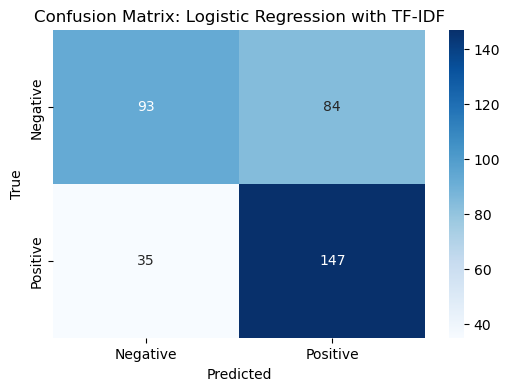

In [116]:
results = []
misclassified_examples_tf_log = []
misclassified_examples_tf_svm = []
misclassified_examples_tf_naive = []
misclassified_examples_bow_log = []
misclassified_examples_bow_svm = []
misclassified_examples_bow_naive = []

for vectorizer_name, vectorizer in [("BoW", bow), ("TF-IDF", tf_idf)]:
    transformer.transformers[0][1].steps[1] = ("vectorizer", vectorizer)
    
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("transformer", transformer),
            ("classifier", model)
        ])
        
        pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label=1)
        recall = recall_score(y_test, y_pred, pos_label=1)
        f1 = f1_score(y_test, y_pred, pos_label=1)
        
        cm = confusion_matrix(y_test, y_pred)
        print(f"\nConfusion Matrix for {vectorizer_name} - {model_name}:")
        print(cm)
        
        results.append({
            "Vectorizer": vectorizer_name,
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1
        })
        
        if vectorizer_name == "TF-IDF" and model_name == "Logistic Regression":
            misclassified_idx = X_test.index[y_test != y_pred].tolist()[:10]
            for idx in misclassified_idx:
                misclassified_examples_tf_log.append({
                    "Original Text": original_texts.loc[idx],
                    "Cleaned Text": " ".join(test_df.loc[idx, "cleaned_text"]),
                    "True Label": "positive" if y_test.loc[idx] == 1 else "negative",
                    "Predicted Label": "positive" if y_pred[idx] == 1 else "negative"
                })
                
        if vectorizer_name == "TF-IDF" and model_name == "Linear SVM":
            misclassified_idx = X_test.index[y_test != y_pred].tolist()[:10]
            for idx in misclassified_idx:
                misclassified_examples_tf_svm.append({
                    "Original Text": original_texts.loc[idx],
                    "Cleaned Text": " ".join(test_df.loc[idx, "cleaned_text"]),
                    "True Label": "positive" if y_test.loc[idx] == 1 else "negative",
                    "Predicted Label": "positive" if y_pred[idx] == 1 else "negative"
                })

        if vectorizer_name == "TF-IDF" and model_name == "Multinomial Naive Bayes":
            misclassified_idx = X_test.index[y_test != y_pred].tolist()[:10]
            for idx in misclassified_idx:
                misclassified_examples_tf_naive.append({
                    "Original Text": original_texts.loc[idx],
                    "Cleaned Text": " ".join(test_df.loc[idx, "cleaned_text"]),
                    "True Label": "positive" if y_test.loc[idx] == 1 else "negative",
                    "Predicted Label": "positive" if y_pred[idx] == 1 else "negative"
                })

        if vectorizer_name == "BoW" and model_name == "Multinomial Naive Bayes":
            misclassified_idx = X_test.index[y_test != y_pred].tolist()[:10]
            for idx in misclassified_idx:
                misclassified_examples_bow_naive.append({
                    "Original Text": original_texts.loc[idx],
                    "Cleaned Text": " ".join(test_df.loc[idx, "cleaned_text"]),
                    "True Label": "positive" if y_test.loc[idx] == 1 else "negative",
                    "Predicted Label": "positive" if y_pred[idx] == 1 else "negative"
                })

        if vectorizer_name == "BoW" and model_name == "Linear SVM":
            misclassified_idx = X_test.index[y_test != y_pred].tolist()[:10]
            for idx in misclassified_idx:
                misclassified_examples_bow_svm.append({
                    "Original Text": original_texts.loc[idx],
                    "Cleaned Text": " ".join(test_df.loc[idx, "cleaned_text"]),
                    "True Label": "positive" if y_test.loc[idx] == 1 else "negative",
                    "Predicted Label": "positive" if y_pred[idx] == 1 else "negative"
                })

        if vectorizer_name == "BoW" and model_name == "Logistic Regression":
            misclassified_idx = X_test.index[y_test != y_pred].tolist()[:10]
            for idx in misclassified_idx:
                misclassified_examples_bow_log.append({
                    "Original Text": original_texts.loc[idx],
                    "Cleaned Text": " ".join(test_df.loc[idx, "cleaned_text"]),
                    "True Label": "positive" if y_test.loc[idx] == 1 else "negative",
                    "Predicted Label": "positive" if y_pred[idx] == 1 else "negative"
                })

comparison_df = pd.DataFrame(results)
print("\nModel Comparison Table (Test Set):")
print(comparison_df)

print("\n10 Misclassified Tweets (Logistic Regression with TF-IDF):")
misclassified_df_tf_log = pd.DataFrame(misclassified_examples_tf_log)
print(misclassified_df_tf_log)

print("\n10 Misclassified Tweets (Logistic Regression with BOW):")
misclassified_df_bow_log = pd.DataFrame(misclassified_examples_bow_log)
print(misclassified_df_bow_log)

print("\n10 Misclassified Tweets (Linear SVM with TF-IDF):")
misclassified_df_tf_svm = pd.DataFrame(misclassified_examples_tf_svm)
print(misclassified_df_tf_svm)

print("\n10 Misclassified Tweets (Linear SVM with BOW):")
misclassified_df_bow_svm = pd.DataFrame(misclassified_examples_bow_svm)
print(misclassified_df_bow_svm)

print("\n10 Misclassified Tweets (MultinomialNB with TF-IDF):")
misclassified_df_tf_naive = pd.DataFrame(misclassified_examples_tf_naive)
print(misclassified_df_tf_naive)

print("\n10 Misclassified Tweets (MultinomialNB with BOW):")
misclassified_df_bow_naive = pd.DataFrame(misclassified_examples_bow_naive)
print(misclassified_df_bow_naive)

pipeline = Pipeline([
    ("transformer", transformer.set_params(**{"text__vectorizer": tf_idf})),
    ("classifier", LogisticRegression(random_state=42))
])
pipeline.fit(X_train, y_train)
cm = confusion_matrix(y_test, pipeline.predict(X_test))
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix: Logistic Regression with TF-IDF")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [117]:
def tokens_to_string(token_series):
    return token_series.apply(lambda x: " ".join(x) if isinstance(x, list) and x else "")

token_preprocessor = FunctionTransformer(tokens_to_string)
bow_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()
numerical_features = ["tweets_length", "tweets_words_length", "tweets_sentences_length", "year", "month", "day"]
text_feature = "cleaned_text"

transformer = ColumnTransformer([
    ("text", Pipeline([
        ("token_preprocessor", token_preprocessor),
        ("vectorizer", None)  
    ]), text_feature),
    ("numerical", "passthrough", numerical_features)
])

X_train = df[numerical_features + [text_feature]]
y_train = df["target"]  

transformer_tfidf = transformer.set_params(**{"text__vectorizer": tfidf_vectorizer})
pipeline_tfidf_svm = Pipeline([
    ("transformer", transformer_tfidf),
    ("classifier", LinearSVC(random_state=42))
])

pipeline_tfidf_svm.fit(X_train, y_train)
with open("C:\\Users\\lenovo\\Downloads\\trainingandtestdata\\sentiment_model_tfidf_svm.pkl", "wb") as f:
    pickle.dump(pipeline_tfidf_svm, f)
print("Saved TF-IDF with Linear SVM pipeline to sentiment_model_tfidf_svm.pkl")

transformer_bow = transformer.set_params(**{"text__vectorizer": bow_vectorizer})
pipeline_bow_svm = Pipeline([
    ("transformer", transformer_bow),
    ("classifier", LinearSVC(random_state=42))
])

pipeline_bow_svm.fit(X_train, y_train)
with open("C:\\Users\\lenovo\\Downloads\\trainingandtestdata\\sentiment_model_bow_svm.pkl", "wb") as f:
    pickle.dump(pipeline_bow_svm, f)
print("Saved BoW with Linear SVM pipeline to sentiment_model_bow_svm.pkl")

Saved TF-IDF with Linear SVM pipeline to sentiment_model_tfidf_svm.pkl
Saved BoW with Linear SVM pipeline to sentiment_model_bow_svm.pkl


## Gensim has compitability issues with my python version and I tried to install python 3.12 version as I have built my whole work on it through Anaconda prompt but it have been deleated by python developers